In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from tqdm import tqdm

import ipywidgets as widgets
from src.models import ContextSpaceNet

In [2]:
train_steps = 50000

n_in = 3 # 2 position + 1 context
n_out = 100 # no. of spatial representations
bs = 64 # batch size

beta = 0

model = ContextSpaceNet(n_in, n_out, beta = beta)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

loss_history = []
progress = tqdm(range(train_steps))
for i in progress: # train loop
    r = torch.tensor(np.random.uniform(-1, 1, (bs, 2)), dtype= torch.float32)
    c = torch.tensor(np.random.uniform(-2, 2, bs), dtype = torch.float32)[:,None]
    inputs = torch.cat((r, c), dim = -1)
    labels = (r, c)
    
    loss = model.train_step(x = inputs, y = labels, optimizer = optimizer)
    
    if i % 10 == 0:
        loss_history.append(loss)
        progress.set_description(f"loss: {loss:>7f}")

loss: 0.001713: 100%|██████████| 50000/50000 [00:38<00:00, 1314.72it/s]


In [3]:
# model.save("./saved_models/FF_context")

Text(0, 0.5, 'Train Loss')

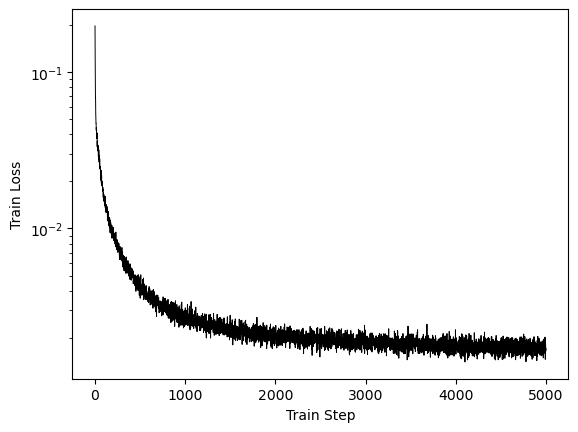

In [4]:
plt.semilogy( loss_history, "-k", linewidth = 0.7)
plt.xlabel("Train Step")
plt.ylabel("Train Loss")

In [5]:
# evaluate on 2x2 grid
n = 32
x = np.linspace(-1, 1, n)
y = x.copy()
xx, yy = np.meshgrid(x,y)
u = torch.tensor(np.stack([xx.ravel(), yy.ravel()], axis = -1), dtype= torch.float32)

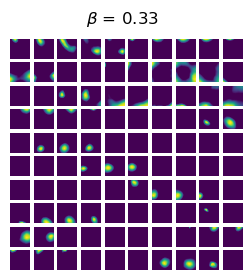

In [6]:

n_show = 10
n_c = 10

fig, ax = plt.subplots(n_show, n_c, figsize = (3, 3))

c = np.linspace(-2, 2, n_c)

for i in range(n_c):
    context = c[i]*torch.tensor(np.ones(len(u)), dtype = torch.float32)
    inputs = torch.cat((u, context[...,None]), dim = -1)
    p = model(inputs)[1].detach().numpy()
    for j in range(n_show):
        ax[j,i].imshow(p[:,j].reshape(n,n))
        ax[j,i].axis("off")
plt.suptitle(f"$\\beta$ = {beta}")
plt.savefig(f"./figures/beta_{beta}.png", dpi = 300)

In [7]:
model.beta

0.33